# Integração numérica

## Métodos de integração de ordens mais altas

Vimos na parte 1 como fazer uma integração numérica aproximando a curva de uma função $f(x)$ a uma reta (regra do trapézio), e usando uma curva quadrática (regra de Simpson). Podemos criar regras de mais altas ordens repetindo o raciocínio usado nesses casos. Lembre que *ajustamos* um polinômio a pontos onde passa a função, e calculamos a sua integral analítica.

A regra geral das regras do trapézio e de Simpson, e de regras de ordens maiores, é

$$
\int_a^b f(x)\ \mathrm{d}x \cong \sum_{k=1}^{N} w_k f(x_k),
$$

onde $x_k$ são os pontos de amostragem, e $w_k$ são os pesos associados a cada amostragem $f(x_k)$. Na regra do trapézio, o primeiro e o último peso são $\frac 1 2 h$, e os outros são todos $h$. Já na regra de Simpson, os pesos são $\frac 1 3 h$ para o primeiro e o último, e alternam entre $\frac 4 3 h$ e $\frac 2 3 h$ para os demais. Em ordens mais elevadas, chega-se a conjuntos similares de pesos. Estas ordens mais elevadas são chamadas de fórmulas de Newton–Cotes, mas não vamos nos alongar neste assunto.

Em vez disso, façamos uma constatação importante que é, se $f(x)$ é uma reta, então a regra do trapézio dá o resultado exato (desenhe os segmentos se não acredita). Do mesmo jeito, a regra de Simpson dá o resultado exato se a função integrada é uma parábola, e se a função é um polinômio de grau $m$, então a $m$-ésima fórmula de Newton–Cotes fornece o resultado exato. Em outras palavras, se tivermos $N$ pontos amostrados de uma função $f(x)$ que pode ser bem aproximada por um polinômio de grau $<(N-1)$, temos um método de integração bastante robusto.

Podemos fazer melhor que isso. Lembre que os métodos já vistos usam um espaçamento homogêneo entre as amostragens $x_k$. Permitindo que os $x_k$ estejam em posições arbitrárias, temos mais *graus de liberdade* no ajuste de polinômios. Veremos que, mesmo não tendo as vantagens dos métodos vistos na parte 1, podemos conseguir resultados muito mais precisos com um pequeno número de pontos. Um dos métodos que usam esta abordagem é o da *quadratura gaussiana*.

## Quadratura gaussiana

![](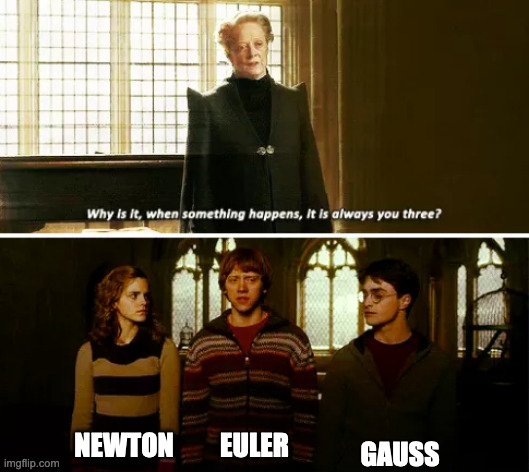
)

Quadratura é um nome rebuscado para "integração numérica". Este método, desenvolvido por Carl Friedrich Gauss, é composto de duas partes. Primeiro vamos derivar regras de integração com espaçamento não uniforme entre os pontos, dado um conjunto de pontos $x_k$. Depois, vamos encontrar qual o conjunto de pontos que nos dará a regra mais otimizada (isto é, ajusta polinômios com o maior grau possível) para a integração.

### Amostragem não uniforme: polinômio interpolador

Suponha que tenhamos um conjunto de $N$ pontos $x_k$ não uniformemente espaçados. Queremos encontrar uma regra de integração conforme a equação acima, isto é, determinar quais os valores de $w_k$ tais que a equação funcione para qualquer função $f(x)$. Para isso, ajustamos um polinômio aos valores $f(x_k)$, e então integramos este polinômio de $a$ até $b$, obtendo assim um valor aproximado da integral. Para ajustar $N$ pontos, precisamos de um polinômio de grau $(N-1)$, vamos usar o método do *polinômio interpolador*. O que vem a seguir pode ser meio abstrato, mas prometo que vai chegar a algum lugar! 

Considere a seguinte quantidade

$$
\phi_k(x) = \prod_{\substack{{m=1} \\ m \neq k}}^N \frac{x - x_m}{x_k - x_m}
$$

onde $\prod$ é o produtório, equivalente multiplicativo do somatório. O numerador contém um fator para cada ponto de amostragem, exceto $x_k$. Logo, $\phi_k(x)$ é um polinômio de grau $(N-1)$. Verifique isso com $N = 3$, e veja que realmente temos um polinômio em $x$. Para valores de $k$ indo de $1$ até $N$, esta equação define $N$ polinômios, com os seus coeficientes dependendo de $k$.

Se calcularmos estes polinômios $\phi_k(x)$ sobre um dos pontos de amostragem $x_m$, temos

$$
\phi_k(x_m) =
\begin{cases}
1 & \text{se}\ k = m, \\
0 & \text{se}\ k \neq m.
\end{cases}
$$

Por exemplo, para $N=3$, em $k=1$,

\begin{align}
\phi_1(x) &= \frac{x - x_2}{x_1 - x_2} \frac{x - x_3}{x_1 - x_3} \\
\phi_1(x_1) &= \frac{x_1 - x_2}{x_1 - x_2} \frac{x_1 - x_3}{x_1 - x_3} = 1 \\
\phi_1(x_2) &= \frac{x_2 - x_2}{x_1 - x_2} \frac{x_2 - x_3}{x_1 - x_3} = 0 \\
\phi_1(x_3) &= \frac{x_3 - x_2}{x_1 - x_2} \frac{x_3 - x_3}{x_1 - x_3} = 0.
\end{align}

Faça o mesmo para $k=2$ e $k=3$, para certificar-se.

De forma resumida, dizemos que $\phi_k(x_m) = \delta_{km}$, onde o símbolo $\delta_{km}$ é o chamado *delta de Kroneker*, que vale $1$ quando $k=m$ e zero caso contrário.

Considere agora a função

$$
\Phi(x) = \sum_{k=1}^N f(x_k)\,\phi_k(x).
$$

Lembre que $\phi_k(x)$ são polinômios de grau $(N-1)$, e $f(x_k)$ são números. Logo $\Phi(x)$ é uma combinação linear de polinômios de grau $(N-1)$, ou seja, é também um polinômio de mesmo grau. Se calcularmos $\Phi(x)$ sobre algum ponto de amostragem $x_m$, temos que

$$
\Phi(x_m) = \sum_{k=1}^N f(x_k)\,\phi_k(x_m) = \sum_{k=1}^N f(x_k)\,\delta_{km}.
$$

Como $\delta_{km}$ só é diferente de zero quando $k=m$, a somatória desaparece, sobrando apenas o termo em que $k=m$. Isto é,

$$
\Phi(x_m) = \sum_{k=1}^N f(x_k)\,\delta_{km} = f(x_m).
$$

Quer dizer, $\Phi(x)$ é um polinômio de grau $(N-1)$ que passa sobre todos os pontos $f(x_m)$. Ou seja, é o polinômio que *melhor descreve* $f(x)$ dada a amostragem $x_k$. É exatamente a função que precisamos para obter a nossa regra de integração. Se temos dois pontos, podemos calcular a reta que passa sobre eles. Se temos três pontos, a parábola. Com $N$ pontos, podemos calcular, em princípio, os coeficientes de um polinômio de grau $(N-1)$ que passa sobre eles.

Vamos calcular então um valor aproximado da nossa integral usando a aproximação dada por $\Phi(x)$.

$$
\int_a^b f(x)\ \mathrm{d}x \cong \int_a^b \Phi(x)\ \mathrm{d}x = \int_a^b \sum_{k=1}^N f(x_k)\,\phi_k(x)\ \mathrm{d}x 
$$

Como $f(x_k)$ é constante, este valor pode sair da integral. Também, a integral de uma soma é a soma das integrais, logo,

$$
\int_a^b f(x)\ \mathrm{d}x \cong \sum_{k=1}^N f(x_k) \int_a^b \phi_k(x)\ \mathrm{d}x 
$$

Comparando esta equação com a que aparece no começo do texto,

$$
\int_a^b f(x)\ \mathrm{d}x \cong \sum_{i=1}^{N} w_k f(x_k),
$$

encontramos os pesos $w_k$ necessários à nossa regra de integração:

$$
w_k = \int_a^b \phi_k(x)\ \mathrm{d}x.
$$

Grande coisa! Para calcular uma integral, agora precisamos calcular $N$ integrais! O pior, não existe uma forma fechada para a integral de $\phi_k(x)$. De qualquer modo, se fizermos um esforço hercúleo (usando Simpson, por exemplo), só precisamos calcular $w_k$ uma vez para uma dada amostragem (lembre que na definição de $\phi_k(x)$ entram apenas os $x_k$, ela é independente da função), e depois guardar numa tabela. De posse destes valores, podemos calcular a integral de qualquer função neste intervalo, com esta amostragem.

Na verdade, fazendo substituição de variáveis, podemos calcular um conjunto $\tilde{w}_k$ num intervalo de integração padrão $-1 \leq u \leq 1$, com $N$ amostragens em $u_k$, e depois *reparametrizar* todas as variáveis para um intervalo de integração de $a$ até $b$. Isto é, calcular

$$
\int_{-1}^1 f(u)\ \mathrm{d}u \cong \sum_{i=1}^{N} \tilde{w}_k f(u_k) \\
\tilde{w}_k = \int_{-1}^1 \phi_k(u)\ \mathrm{d}u .
$$

É fácil encontrar a relação entre variáveis em $x$ e $u$. Sabemos que quando $x=a$, $u=-1$, e quando $x=b$, $u=1$. Usando uma lei linear, tal que $x(u) = \alpha u + \beta$, temos

\begin{align}
x(-1) &= a = -\alpha + \beta \\
x(1) &= b = \alpha + \beta \\
\implies \alpha &= \frac{b - a}{2} \\
\beta &= \frac{b + a}{2}.
\end{align}

Assim,

\begin{align}
x(u) &= \frac{b - a}{2} u + \frac{b + a}{2} \\
\mathrm{d}x &= \alpha\,\mathrm{d}u = \frac{b - a}{2} \mathrm{d}u .
\end{align}

Substituindo na integral original, temos

\begin{align}
\int_a^b f(x)\ \mathrm{d}x &= \int_{-1}^1 f\!\left( x(u) \right) \frac{b - a}{2} \mathrm{d}u \\
&= \frac{b - a}{2}  \int_{-1}^1 f\!\left( x(u) \right) \mathrm{d}u\\
&\cong \frac{b - a}{2} \sum_{k=1}^N \tilde{w}_k\ f\!\left(\frac{b - a}{2} u_k + \frac{b + a}{2} \right) \\
&\cong \sum_{k=1}^N w_k\ f\!\left(x_k \right).
\end{align}

Recapitulando, para calcular a aproximação de uma integral em um intervalo qualquer, precisamos calcular $x_k$ e $w_k$. Suponha que temos pré-calculados os pontos de amostragem no intervalo $-1 < u_k < 1$, e os pesos $\tilde{w}_k$. Neste caso, os pontos de amostragem são obtidos através da transformação

\begin{align}
w_k &= \frac{b - a}{2} \tilde{w}_k \\
x_k &= \frac{b - a}{2} u_k + \frac{b + a}{2}.
\end{align}

Com isso, podemos finalmente aplicar a nossa regra  de integração. Basta apenas, então, obter esta famigerada tabela de $u_k$ e $\tilde{w}_k$. Veremos agora como fazer isso de uma forma engenhosa.

### Pontos de amostragem para a quadratura gaussiana

Já resolvemos metade do problema. Se tivermos um conjunto de pontos $u_k$, podemos produzir os pesos $\tilde{w}_k$. Como discutimos no começo do texto, em tese se podemos variar arbitrariamente $u_k$, obtendo $f(u_k)$, temos $2N$ valores, ou *graus de liberdade*. Assim, no melhor dos casos, nossa regra pode ser exata para qualquer integrando polinomial de grau $(2N-1)$. Infelizmente provar esta afirmação, e encontrar os pontos, é uma tarefa bastante envolvida. Vamos pular direto para os resultados. Para os que quiserem se aventurar, veja o capítulo 8 (mais precisamente, na seção 8.5) do livro [Introduction to Numerical Analysis](https://archive.org/details/introduction_to_numerical_analysis_hildebrand), de F. B. Hildebrand.

Indo direto ao ponto, os pontos $u_k$ devem coincidir com as raízes do $N$-ésimo polinômio de Legendre $P_N(u)$, e os pesos $\tilde{w}_k$ correspondentes dados por

$$
\tilde{w}_k = \left[ \frac{2}{1 - u^2} \left(\frac{\mathrm{d}P_N}{\mathrm{d}u} \right)^{-2} \right]_{u=u_k}.
$$

### Exercício

Vamos calcular pela última vez o valor da nossa conhecida função

$$
I = \int_{0.1}^{1.0} \frac{\mathrm{d}x}{x} = \ln(x) \big|_{0.1}^{1.0} = - \ln(0.1) = \ln(10).
$$

**a.** Para $N = 7$, os pontos de amostragem são as raízes do polinômio de Legendre de grau $7$, isto é,

$$
P_7(u) = \frac{1}{16} \left( 429 u^7 - 693 u^5 + 315 u^3 - 35 u \right).
$$

Encontre as raízes desse polinômio, que são os pontos de amostragem $u_k$. Para simplificar, use 10 iterações do método de Newton. Deixe o resultado num array de 7 elementos.

*Dica: tente automatizar a busca, supondo que as raízes estão, de forma aproximada, igualmente espaçadas no intervalo $-1 \leq u \leq 1$.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u_k_inicial = [-1, -0.75, -0.5, 0.0, 0.5, 0.75, 1]
u_k = np.zeros(7)
w_linha_k = np.zeros(7)

def f(u):
    return (429*u**7 - 693*u**5 + 315*u**3 - 35*u) / 16

def df(u):
    return (3003*u**6 - 3465*u**4 + 945*u**2 - 35) / 16

def raizesNewton(x1):
    for n in range(10):
        x2 = x1 - (f(x1) / df(x1))
        x1 = x2
    return x2

i = 0
for n in u_k_inicial:
    resultado = raizesNewton(n)
    u_k[i] = resultado
    i += 1
print(u_k)

[-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]


**b.** Calcule os pesos $\tilde{w}_k$.

In [2]:
def w_linha(u):
    return (2/(1 - u**2))*(df(u)**-2)

i = 0
for uk in u_k:
    w_linha_k[i] = w_linha(uk)
    i += 1
    
print(w_linha_k)

[0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]


**c.** Transforme os pontos de amostragem e os pesos para o intervalo de integração do nosso problema. Use aritmética de arrays se possível.

In [3]:
x_k = np.zeros(7)
w_k = np.zeros(7)

a = 0.1
b = 1.0

for i in range(0, 7):
    w_k[i] = (b - a) * w_linha_k[i] / 2
    x_k[i] = ((b - a) * u_k[i] / 2) + ((b + a) / 2)
    
print(w_k)
print(x_k)

[0.05826823 0.12586743 0.17182352 0.18808163 0.17182352 0.12586743
 0.05826823]
[0.12290144 0.21631097 0.36736968 0.55       0.73263032 0.88368903
 0.97709856]


**d.** Calcule a aproximação da integral e compare com o valor analítico.

In [4]:
def integrando(x):
    return 1/x

def integralGauss(N):
    integral = 0.0
    
    for k in range(N):
        integral += w_k[k] * integrando(x_k[k])
    return integral

resAnal = np.log(10)
print(integralGauss(7), resAnal)

2.302264348289716 2.302585092994046


Encontrar as raízes de um polinômio de Legendre arbitrário é uma tarefa um pouco complicada. Vamos usar a função `roots_legendre()` do pacote `scipy`. Esta função retorna $u_k$ e $\tilde{w}_k$, ou seja, precisamos reparametrizar os resultados antes de aplicar a regra de integração. Veja no exemplo abaixo as posições e pesos para $N = 7$.

In [5]:
from scipy.special import roots_legendre
N = 7
uk, _wk = roots_legendre(n=N)

for i in range(1, N + 1):
    print(f'u_{i} = {uk[i - 1]:.3f}, ~w_{i} = {_wk[i - 1]:.3f}')

u_1 = -0.949, ~w_1 = 0.129
u_2 = -0.742, ~w_2 = 0.280
u_3 = -0.406, ~w_3 = 0.382
u_4 = 0.000, ~w_4 = 0.418
u_5 = 0.406, ~w_5 = 0.382
u_6 = 0.742, ~w_6 = 0.280
u_7 = 0.949, ~w_7 = 0.129


Abaixo, fazemos o gráfico dos pesos para $N = 10$ e $N=30$. Note que os pontos ficam mais aglomerados nas bordas do intervalo, e os pesos diminuem.

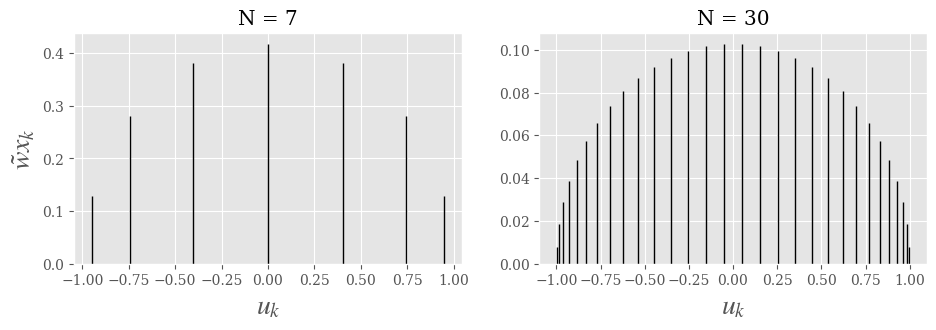

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 3))

uk, wk = roots_legendre(n=7)
s = ax1.stem(uk, wk, linefmt='k-', markerfmt=' ', basefmt=' ')#, use_line_collection=True)
plt.setp(s.stemlines, 'linewidth', 1)
ax1.set_title('N = 7')
ax1.set_xlabel(r'$u_k$')
ax1.set_ylabel(r'$\tilde{w}x_k$')
ax1.set_ylim(0, None)

uk, wk = roots_legendre(n=30)
s = ax2.stem(uk, wk, linefmt='k-', markerfmt=' ', basefmt=' ')#, use_line_collection=True)
plt.setp(s.stemlines, 'linewidth', 1)
ax2.set_title('N = 30')
ax2.set_xlabel(r'$u_k$')
ax2.set_ylim(0, None)
plt.show()

**e.** Defina uma função chamada `calcula_I_gauss(N)` que calcule a integral de interesse. Use `roots_legendre(N)` para obter os pontos de amostragem e pesos.

In [7]:
N = 7
a = 0.1
b = 1.0
I = 0.0
u_k, w_linha_k = roots_legendre(N)
x_k = np.zeros(7)
w_k = np.zeros(7)

for i in range(0, 7):
    w_k[i] = (b - a) * w_linha_k[i] / 2
    x_k[i] = ((b - a) * u_k[i] / 2) + ((b + a) / 2)
    I += w_k * f(x_k)
    
print(I, resAnal)

[-0.09524034 -0.2219057  -0.07999636  0.22625115  0.01799537 -0.10181213
  0.02632414] 2.302585092994046


**f.** Podemos conferir agora se a quadratura gaussiana é realmente melhor do que os outros métodos. Recorde que a regra de Simpson era a melhor dentre as que já estudamos. Faça o gráfico da convergência da integral, para $N$ entre $4$ e $20$, usando os dois métodos.

In [8]:
#metodo de Simpson
def integralSimpsonGeral(f, a, b, N):
    h = (b - a) / N
    integralImp = 0
    integralPar = 0
    integral = 0
    xi = 0

    for i in range(1, N, 2): #impares
        xi = a + i*h
        integralImp += f(xi)
        
    xi = 0
    for i in range(2, N, 2): #pares
        xi = a + i*h
        integralPar += f(xi)
        
    integral = h * (4 * integralImp + 2 * integralPar + f(a) + f(b)) / 3
    return integral

#comparando
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

lista_N = []
lista_Int = []
for n in range(10, 1000, 2):
    lista_N.append(n)
    lista_Int.append(integralSimpsonGeral(integrando, a, b, n))
lista_N_gauss = []
lista_Int_gauss = []
for n in range(10, 1001):
    lista_N_gauss.append(n)
    lista_Int_gauss.append(integralGauss(n))

fig, ax = plt.subplots()
ax.axhline(resAnal, ls=':', color='k')
ax.plot(lista_N, lista_Int, label="Metodo Simpson")
ax.plot(lista_N_gauss, lista_Int_gauss, label="Metodo Gauss")
ax.set_xscale('log')
ax.legend()
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

A convergência da quadratura gaussiana é muito mais rápida. Em geral, $N = 10$ é uma boa escolha. Dificilmente precisamos de $N$ muito grande, veja que, neste exemplo, o resultado quase não muda com $N > 10$.

## Conclusão

A função que programamos para calcular a quadratura gaussiana é muito simples, mais até que a regra de Simpson. Mas não se engane, a maior parte da complexidade está na determinação dos pesos e das posições de amostragem. O livro do Mark Newman tem a implementação de um código para calcular estes valores. Os mais ousados podem conferir como isso pode ser feito no módulo [gaussxw.py](http://www-personal.umich.edu/~mejn/cp/programs/gaussxw.py). A versão que usamos, `roots_legendre()` do pacote `scipy` é muito mais rápida e precisa, e é de fato a forma recomendada.

Para mais detalhes sobre integração numérica, leia o [capítulo 5 do livro do Mark Newman](http://www-personal.umich.edu/~mejn/cp/chapters/int.pdf).